###1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

###2

In [33]:
uploaded = files.upload()

Saving messed_up_iris.xlsx to messed_up_iris (6).xlsx


In [34]:
data = pd.read_excel('messed_up_iris.xlsx')

In [35]:
print(data.shape)

(150, 8)


In [36]:
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species,color,origin
0,0,5.1,3.5,1.4,0.2,setosa,green,usa
1,1,4.9,3.0,1.4,0.2,setosa,yellow,usa
2,2,4.7,3.2,1.3,0.2,setosa,green,usa
3,3,4.6,3.1,1.5,0.2,setosa,orange,japan
4,4,5.0,3.6,1.4,0.2,setosa,blue,europe


###3

In [37]:
data = data.dropna(thresh=4,axis='index')
data = data.dropna(thresh=75,axis='columns')
data.shape

(145, 7)

###4

In [38]:
data.duplicated()
any(data.duplicated())

False

In [39]:
data = data.drop_duplicates(ignore_index=True) 

In [40]:
data.shape

(145, 7)

###5

In [41]:
data['origin'].value_counts()

usa        49
europe     48
japan      45
uas         2
euarope     1
Name: origin, dtype: int64

In [42]:
data['species'].value_counts()

setosa           51
virginica        47
versicolor       42
seotsa            2
virginia          1
west virginia     1
versicolr         1
Name: species, dtype: int64

In [43]:
data['origin'] = np.where(data['origin']=='uas','usa',data['origin'])
data['origin'] = np.where(data['origin']=='euarope','europe',data['origin'])
data['species'] = np.where(data['species']=='seotsa','setosa',data['species'])
data['species'] = np.where(data['species']=='versicolr','versicolor',data['species'])
data['species'] = np.where(data['species']=='virginia','virginica',data['species'])
data['species'] = np.where(data['species']=='west virginia','virginica',data['species'])

In [44]:
origin_df = pd.get_dummies(data['origin'])
species_df = pd.get_dummies(data['species'])

In [45]:
origin_df.head()

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In [46]:
species_df.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


###6

In [16]:
origin_df = pd.get_dummies(data['origin'], drop_first=True)
species_df = pd.get_dummies(data['species'], drop_first=True)

In [17]:
origin_df.head()

,japan,usa
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [18]:
species_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


###7

In [19]:
data.std()

Unnamed: 0      43.808532
sepal_length     9.857874
sepal_width      3.973838
petal_length     8.725696
petal_width      3.481289
dtype: float64

In [20]:
data.shape

(145, 7)

In [21]:
#Above +2 std()
data.drop(data.index[data['sepal_length'] > data.std().sepal_length + 2], inplace = True)
data.drop(data.index[data['sepal_width'] > data.std().sepal_width + 2], inplace = True)
data.drop(data.index[data['petal_length'] > data.std().petal_length + 2], inplace = True)
data.drop(data.index[data['petal_width'] > data.std().petal_width + 2], inplace = True)

In [22]:
data.shape

(133, 7)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 144
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    133 non-null    int64  
 1   sepal_length  125 non-null    float64
 2   sepal_width   126 non-null    float64
 3   petal_length  125 non-null    float64
 4   petal_width   131 non-null    float64
 5   species       133 non-null    object 
 6   origin        133 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


###8

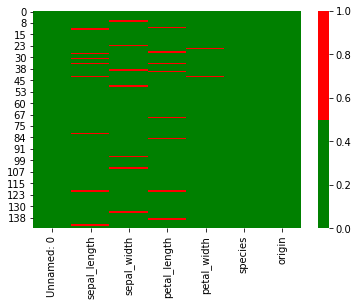

In [28]:
sns.heatmap(data.isnull(),cmap=['Green','Red'])

In [29]:
data2 = data.fillna(data.median())

In [31]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 144
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    133 non-null    int64  
 1   sepal_length  133 non-null    float64
 2   sepal_width   133 non-null    float64
 3   petal_length  133 non-null    float64
 4   petal_width   133 non-null    float64
 5   species       133 non-null    object 
 6   origin        133 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 8.3+ KB


In [32]:
data2.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width
count,133.000000,133.000000,133.000000,133.000000,133.000000
mean,74.270677,5.831579,3.069925,3.716541,1.174436
std,44.115744,0.780090,0.443981,1.725090,0.768573
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.000000,5.100000,2.800000,1.500000,0.300000
50%,73.000000,5.800000,3.000000,4.300000,1.300000
75%,113.000000,6.400000,3.400000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000
